# Exercise Sheet 05: Recommender Systems

**Introduction to Data Mining WS23/24**  
**Bielefeld University**  
**Alina Deriyeva, Benjamin Paaßen**  
**Exercise Sheet Publication Date: 2024-01-08**  
**Exercise Sheet Submission Deadline: 2024-01-19, noon (i.e. 12:00)**, via **moodle** (please do not use e-mail submissions anymore).

**NOTE** The use of language models/AI tools is permitted IF you notify us of the use (just indicate it in the respective task) and are still able to understand and present your results. We also appreciate it if you link to a chatlog of the interaction with the language model/AI tool so that we can understand better how students tend to use these tools.

**PLEASE INDICATE ALL AUTHORS OF THE SUBMISSION IN THIS FIELD**
Christoph Geske, ...

### Preamble: Data set

Consider the data set in `sheet05_data.csv`. This data set contains the study progress of 50 students in a fictional university bachelor computer science dgree.

Each row corresponds to one attempt of one student at a course. The first column contains the student index $i$, the second column the time step $t$, the third column the course index $j$, and the fourth column the grade the student achieved, where -2 means failed, -1 means passed with a not so good grade, +1 means passed with a good grade, and +2 means passed with an excellent grade.

The courses are the following.

In [114]:
courses = ['A&D', 'math', 'programming', 'technical CS', 'theoretical CS', 'robotics', 'machine learning', 'data mining', 'software engineering']
grades  = ['failed', 'passed', 'good', 'excellent']

The following codes loads the data and prints the progress for the first student.

In [115]:
# AI tools (Bing Chat) used for commenting

# import the numpy and matplotlib libraries
import numpy as np
import matplotlib.pyplot as plt

# load the data from the csv file into a numpy array
X = np.loadtxt('sheet05_data.csv', skiprows = 1, delimiter = '\t', dtype=int)

# define the list of courses and grades
courses = ['A&D', 'math', 'programming', 'technical CS', 'theoretical CS', 'robotics', 'machine learning', 'data mining', 'software engineering']
grades  = ['failed', 'passed', 'good', 'excellent']

# initialize the time step to zero
t = 0
# print the progress for student 0
print('progress for student 0')
# loop until the student index changes
while True:
    # get the student index, course index, and grade from the data array
    # where t is the time step and X[t, 0] is the student index
    i = X[t, 0]
    # where X[t, 2] is the course index
    j = X[t, 2]
    # where X[t, 3] is the grade
    g = X[t, 3]
    # if the student index is not zero, break the loop since we only want to loop through the entries of student 0
    if i > 0:
        break
    # print the time step, course name, and grade
    print('time %d: \"%s\" with grade \"%s\"' % (t, courses[j], grades[g]))
    # increment the time step
    t += 1


progress for student 0
time 0: "math" with grade "passed"
time 1: "A&D" with grade "excellent"
time 2: "technical CS" with grade "good"
time 3: "programming" with grade "good"
time 4: "data mining" with grade "passed"
time 5: "technical CS" with grade "excellent"
time 6: "programming" with grade "passed"
time 7: "software engineering" with grade "good"
time 8: "robotics" with grade "good"


## Markov chains

In the following tasks, we will apply a Markov chain to this data set. A Markov chain is defined by two types of parameters: For each course $j$, we have a starting probability $\pi_j$. And for each pair for courses $(j, k)$, we have a probability $p_{j, k}$ that indicates the likelihood of attempting course $k$ after course $j$.

### Task 05.01

Compute a Markov Chain based on the given data set. In particular.

1. Generate a vector `pi` with `len(courses)` entries where `pi[j]` is the number of times course `j` was attempted as first course.
2. Divide `pi` by its sum to obtain probabilities.
3. Generate a matrix `P` with `len(courses) x len(courses)` entries where `P[j, k]` is the number of times course `k` was attempted after course `j`.
4. Divide each row of `P` by its sum to obtain probabilities.

In [116]:
# AI tools (Bing Chat) used for all the code (generated in multiple steps refining errors made by the AI) and partly for commenting

# initialize the vector pi with zeros
pi = np.zeros(len(courses), dtype=int)

# loop over the data array
for t in range(len(X)):
    # get the student index, course index, and grade from the data array
    # where t is the time step and X[t, 0] is the student index
    i = X[t, 0]
    # where X[t, 2] is the course index
    j = X[t, 2]
    # where X[t, 3] is the grade
    g = X[t, 3]
    # if the time step is zero, increment the corresponding entry in pi (since the course was attempted as the first course)
    # t is 0 for the first attempt of each student lets say student 0 attempts math first, then t is 0 for the first attempt of math. This is also the cases we want to increment. If t would be 1, then we don't want to increment pi, since the course was not attempted as the first course.
    # i != X[t-1, 0], is true when the student index is different from the previous one, which means the start of a new student’s progress. For example, this is true for the row with time step 9, which is the first attempt of student 1 at course 1 “programming”. So, we increment the entry in pi for course “programming” and then loop through the entries until another student appears in the list.
    if t == 0 or i != X[t-1, 0]: 
        pi[j] += 1

# divide pi by its sum to obtain probabilities
pi = pi / pi.sum()

# initialize the matrix P with zeros
P = np.zeros((len(courses), len(courses)), dtype=int)

# loop over the data array again
for t in range(1, len(X)):
    # get the student index, course index, and grade from the data array
    # where t is the time step and X[t, 0] is the student index
    i = X[t, 0]
    # where X[t, 2] is the course index
    j = X[t, 2]
    # where X[t, 3] is the grade
    g = X[t, 3]

    # if the student index is the same as the previous one, increment the corresponding entry in P
    # this means that the current row in the data array corresponds to a subsequent attempt of a student at a course
    # we want to count how many times a course was attempted after another course
    # for example, if a student attempts course "math" after course "A&D", we want to increment the entry in P for (A&D, math)
    # k represents the previous course and j the current course index
    # P[k, j] is the entry in P for the pair of courses (k, j)
    # i == X[t-1, 0] is true when the student index is the same as the previous one, which means a subsequent attempt of the same student at a course.
    # if the course index is the same as the previous one, we don't want to increment the entry in P, since we want to count how many times a course was attempted after another course. In order to prevent counting the same course as the previous one, we check if the course index is the same as the previous one. The course index is the same as the previous one, if j == X[t-1, 2].
    if i == X[t-1, 0]: # Add this code " and j != X[t-1, 2]" if you want to prevent that the same course repeating is also counted.
        k = X[t-1, 2]
        P[k, j] += 1

# divide each row of P by its sum to obtain probabilities
P = P / P.sum(axis=1, keepdims=True)


### Task 05.02

Try to understand the following code. Then, execute it.

In [117]:
# AI tools (Bing Chat) used partly for commenting

print("for a student who has not attempted any course yet, the Markov chain would predict next:")
# loop over the courses
for j in range(len(courses)):
    # print the course name and the probability of attempting it as the first course
    # the probability is given by the vector pi
    print("  \"%s\" with probability %d%%" % (courses[j], 100 * pi[j]))

# loop over the courses again
for last_j in range(len(courses)):
    print("for a student who has attempted \"%s\" last, the Markov chain would predict next:" % courses[last_j])
    # loop over the courses once more
    for j in range(len(courses)):
        # print the course name and the probability of attempting it after the last course
        # the probability is given by the matrix P
        print("  \"%s\" with probability %d%%" % (courses[j], 100 * P[last_j, j]))


for a student who has not attempted any course yet, the Markov chain would predict next:
  "A&D" with probability 20%
  "math" with probability 34%
  "programming" with probability 26%
  "technical CS" with probability 20%
  "theoretical CS" with probability 0%
  "robotics" with probability 0%
  "machine learning" with probability 0%
  "data mining" with probability 0%
  "software engineering" with probability 0%
for a student who has attempted "A&D" last, the Markov chain would predict next:
  "A&D" with probability 4%
  "math" with probability 25%
  "programming" with probability 8%
  "technical CS" with probability 14%
  "theoretical CS" with probability 14%
  "robotics" with probability 8%
  "machine learning" with probability 8%
  "data mining" with probability 0%
  "software engineering" with probability 14%
for a student who has attempted "math" last, the Markov chain would predict next:
  "A&D" with probability 10%
  "math" with probability 25%
  "programming" with probability 

### Task 05.03

1. Consider a student who has attempted no course, yet. What are the probabilities, according to the Markov chain, to attempt "theoretical CS", "robotics", "machine learning", "data mining", or "software engineering", next? How do you explain these probabilities?
2. Consider a student who has attempted "math" last. What is the probability, as predicted by the Markov chain, to attempt "math" again? How do you explain this probability?

**Answer:**

1. The probabilities are given by the vector pi. The probability of attempting one of these courses next is 0%. This means that none of the students in the data set attempted any of these courses as their first course. These courses are probably more advanced and require some prerequisites from the students.
2. With this line of code "and j != X[t-1, 2]" I can exclude the possibility of counting attempts of the same course again. So, the probability of attempting "math" again is 0% as is the possibility of attempting any other course again. But if I don't use this line and don't remove the cases where the same course is attempted again after the previous one I get 25%. This might be the more realistic model since students likely try a course again if they failed it previously or want to improve their grade. 

### Task 05.04

Assume we wanted to use this Markov chain for recommendations by always recommending the course with the highest probability.

Discuss, whether this recommendation scheme makes sense for this data set. In particular:
* Explain at least one advantage of Markov Chain-based recommendation for this data set.
* Explain at least three problems of Markov Chain-based recommendation for this data set.

**ANSWER:** 

AI tools (Bing Chat) used for helping in generating answers.
 
**Advantage:**

* Predictability: The Markov Chain model provides a probabilistic approach to predicting the next course a student might take based on their current course. This can be useful in understanding the general trend or pattern in course selection among students.

* Not a Black Box: Unlike some machine learning models, matrix factorization is not a black box. It provides clear and interpretable results. 

**Disadvantages:**

The Markov chain assumes that the course choice depends only on the last course, and ignores the other courses that the student has attempted.

The Markov chain does not account for the availability, prerequisites, or requirements of the courses, and may recommend courses that the student cannot or should not take.

The Markov chain does not consider the preferences, feedback, or satisfaction of the students, and may recommend courses that the student does not like or enjoy. For example, it may recommend a course that the student has already taken and disliked, or a course that the student has no interest in.

The Markov chain does not update or adapt to the changing behavior or feedback of the students, and may recommend courses that are outdated, or it may recommend a course that the student has already taken and passed.


## Collaborative filtering

User-based collaborative filtering tries to recommend courses to a student based on the grades of students who achieved similar grades previously.

More precisely, let $g_1, \ldots, g_m$ be the grades of a new student for each course, where $g_j = 0$ if a course was not yet attempted. And let $g_{i, 1}, \ldots, g_{i, m}$ be the grades of student $i$ for each course.

Then, user-based collaborative filtering generates recommendations as follows.

1. Compute the similarity $s_i$ of the grades of the new student on any course to the grades of prior students $i$. For example, we can use the cosine similarity:
\begin{equation}
s_i = \frac{\sum_{j=1}^m g_j \cdot g_{i, j}}{\sqrt{\sum_{j=1}^m g_j^2} \cdot \sqrt{\sum_{j=1}^m g_{i, j}^2}}.
\end{equation}
2. We compute the estimated rating of the new student for course $j$ via the equation:
\begin{equation}
g_j \approx \frac{\sum_{i : g_{i, j} \neq 0}^N s_i \cdot g_{i, j}}{\sum_{i : g_{i, j} \neq 0} s_i},
\end{equation}
in other words we take the weighted average grade of all students who have attempted the course.

### Task 05.05

Compute a matrix $G$ with one row per student and one column per course with entries $g_{i, j}$ as defined above, i.e. the grade of student $i$ on course $j$ in their final attempt on the course, where $g_{i, j} = 0$ if student $i$ has not yet attempted course $j$. Print the matrix.

In [118]:
# AI tools (Bing Chat) used for the code and partly for commenting

# Number of students and courses
# X[:, 0] selects all rows of the first column (index 0) from the 2D numpy array X. This column represents the student indices.
# np.max(X[:, 0]) finds the maximum value in this array, which corresponds to the highest student index and the plus 1, so we count the 0 as well.
num_students = np.max(X[:, 0]) + 1  # or use len( np.unique(X.T[0]) )
num_courses = len(courses)

# Initialize G
G = np.zeros((num_students, num_courses))

# Update G
# Loop over each row in the data array X
for student_index, time_step, course_index, grade in X:
    # Update the corresponding entry in the grading matrix G
    # Here we have to use the final attempt of each student at each course, so we have to overwrite the previous attempts which happens automatically using this code.
    G[student_index, course_index] = grade

# Print G with labels
print("Grading Matrix (G):")
print("Courses: ", ','.join(courses))
for i in range(num_students):
    print(f"Student {i+1}:{G[i]}")

Grading Matrix (G):
Courses:  A&D,math,programming,technical CS,theoretical CS,robotics,machine learning,data mining,software engineering
Student 1:[-1.  1.  1. -1.  0. -2.  0.  1.  2.]
Student 2:[ 1. -1.  1. -2.  1.  0.  1.  2. -2.]
Student 3:[ 2. -1.  1. -1.  2.  0.  0. -1. -1.]
Student 4:[-1. -2. -1. -2.  1.  0.  0.  0.  0.]
Student 5:[ 0.  1.  0. -2.  0.  0. -2.  0.  0.]
Student 6:[-1.  1.  1.  1. -1.  1.  1. -1.  1.]
Student 7:[ 1. -2.  1. -1. -1. -2.  0.  0.  2.]
Student 8:[ 1. -1.  1.  2.  2.  0. -1.  1.  1.]
Student 9:[ 2. -1.  2.  2. -1.  0.  0.  2.  2.]
Student 10:[-1.  1. -1.  1. -2.  1.  0. -1.  1.]
Student 11:[-1. -2. -1. -1.  1.  0.  0.  0.  1.]
Student 12:[ 2. -1.  2. -1. -1.  1.  0.  0. -1.]
Student 13:[-2. -2. -1. -1.  0. -2.  0.  0.  0.]
Student 14:[-2.  2. -1.  2.  0. -1.  2.  2.  0.]
Student 15:[-2.  2. -1. -1.  0.  0.  0.  2. -2.]
Student 16:[ 1. -1.  1.  2.  2. -1.  0.  0. -1.]
Student 17:[-1. -1.  2.  0. -2.  0. -1.  2.  0.]
Student 18:[-1. -1. -1. -1.  1.  0. -1

### Task 05.06

Write a python function that takes a vector of grades as input and returns a copy of this vector where each zero entry is replaced with the collaborative filtering estimate $g_j$ of the grade according to the scheme above.

Use your function to print the estimated grades for two fictional students:
1. A student who has achieved an excellent grade in programming and good in technical CS as well as A&D but only passing in math and has not yet attempted any other course.
2. A student who has achieved an excellent grade in math and A&D but only passing in technical CS and programming and has not yet attempted any other course.

Which course would you recommend for these two students, respectively, given the grade estimates?

In [119]:
# AI tools (Bing Chat) used for the code and partly for commenting

# Function to calculate cosine similarity
def cosine_similarity(a, b):
    # The cosine similarity is calculated as the dot product of a and b divided by the product of their norms.
    # This gives a measure of how similar the two vectors are.
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# Function to estimate grades
def estimate_grades(student_grades, G):
    # We start by making a copy of the student's grades. We will modify this copy with our estimates.
    estimated_grades = np.copy(student_grades)
    # We loop over each course (represented by the index j)
    for j in range(len(student_grades)):
        # If the student has not yet attempted the course (grade is 0)
        if student_grades[j] == 0:
            # We calculate the similarity between the student's grades and the grades of all other students for this course.
            # This gives us a measure of how similar this student is to each other student in terms of their grades for this course.
            similarities = [cosine_similarity(student_grades, G[i]) for i in range(G.shape[0])]
            # We then estimate the student's grade for this course as a weighted average of the other students' grades,
            # where the weights are the similarities we just calculated.
            estimated_grades[j] = np.dot(similarities, G[:, j]) / np.sum(similarities)
    # We return the estimated grades
    return estimated_grades

# Create vectors for the two fictional students
# The numbers represent the grades for each course. 0 means the course has not been attempted yet.
student1 = np.array([2, 1, 0, 1, -1, 0, 0, 0, 0])
student2 = np.array([-1, 2, 1, -1, 0, 0, 0, 0, 0])

# Estimate grades for the courses they haven't attempted yet
# We use our function to estimate the grades for each student
estimated_grades1 = estimate_grades(student1, G)
estimated_grades2 = estimate_grades(student2, G)

# Print the estimated grades
print("Estimated grades for student 1:", estimated_grades1)
print("Estimated grades for student 2:", estimated_grades2)

# Recommend the course with the highest estimated grade for each student
# We find the index of the course with the highest estimated grade, and use this index to look up the course name in the list of courses.
recommended_course1 = np.argmax(estimated_grades1)
recommended_course2 = np.argmax(estimated_grades2)

print("Recommended course for student 1:", courses[recommended_course1])
print("Recommended course for student 2:", courses[recommended_course2])

Estimated grades for student 1: [ 2  1  0  1 -1  0  0  0  0]
Estimated grades for student 2: [ -1   2   1  -1 -24  -3   0   8  -4]
Recommended course for student 1: A&D
Recommended course for student 2: data mining


**ANSWER:**

### Task 05.07

Discuss whether collaborative filtering makes sense for this kind of data. In particular:

* Explain at least one advantage of collaborative filtering for this data set.
* Explain at least two problems of collaborative filtering for this data set.

**ANSWER:**

**Advantage:**

Personalized Recommendations: Collaborative filtering can provide personalized course recommendations for each student based on their own grades and the grades of similar students. This can potentially lead to more relevant and useful recommendations compared to other methods that do not take individual student's grades into account.

**Disadvantages:**
Cold Start Problem: Collaborative filtering struggles with new students who have not yet attempted any courses. Since these students do not have any grades, it's hard to find similar students and make accurate recommendations.  

Sparsity: The grading matrix can be very sparse, especially if many students have not attempted many courses. This sparsity can make it difficult for collaborative filtering to find similar students and make accurate recommendations.  

Scalability: Collaborative filtering can be computationally expensive as it requires comparing a student to all other students to find similar ones. This can be a problem with a large number of students.

## Matrix factorization

Given an $N \times m$ grading matrix $G$, matrix factorization attempts to find two matrices, namely a $N \times K$ matrix of student rperesentations $U$ and a $K \times m$ matrix of course representations $V$, such that the Frobenius norm $\lVert G - U \cdot V \rvert_F$ is minimized for a given, small $K$. This is achieved via singular value decomposition.

A singular value decomposition returns three output arguments:
1. The matrix of eigenvectors $\tilde U$ of $G \cdot G^T$.
2. The matrix of eigenvalues $\Lambda$ of $G^T \cdot G$.
3. The matrix of eigenvectors $\tilde V$ of $G^T \cdot G$.

The original matrix $G$ can be losslessly reconstructed via $\tilde U_{:, :m} \cdot \Lambda \cdot \tilde V$, taking only the first $m$ columns of $\tilde U$.

For matrix factorization, we decide on a number of $K \ll m$ latent factors and define the student representations as $U := \tilde U_{:, :K} \cdot \sqrt{\Lambda_{:K, :K}}$ and the course representations as $V := \sqrt{\Lambda_{:K, :K}} \cdot \tilde V$.

### Task 05.08

Provide a python function which takes a $N \times m$ grade matrix $G$ as well as a number of latent components $K$ as input and returns the $N \times K$ matrix of student representations $U$ and the $K \times m$ matrix of course representations $V$.

Use the function `np.linalg.svd` to perform the singular value decomposition.

In [120]:
# AI tools (Bing Chat) used for the code and partly for commenting

def matrix_factorization(G, K):
    # Perform singular value decomposition
    U_tilde, s, V_tilde = np.linalg.svd(G)

    # Convert s into a diagonal matrix
    S = np.diag(s)

    # Calculate U and V
    U = U_tilde[:, :K] @ np.sqrt(S[:K, :K])
    V = np.sqrt(S[:K, :K]) @ V_tilde[:K, :]

    return U, V

### Task 05.09

Provide a plot with the number of latent dimensions $K$ on the x axis and the reconstruction error $\lVert G - U \cdot V \rVert_F$ on the y axis for $K$ between 1 and 9.

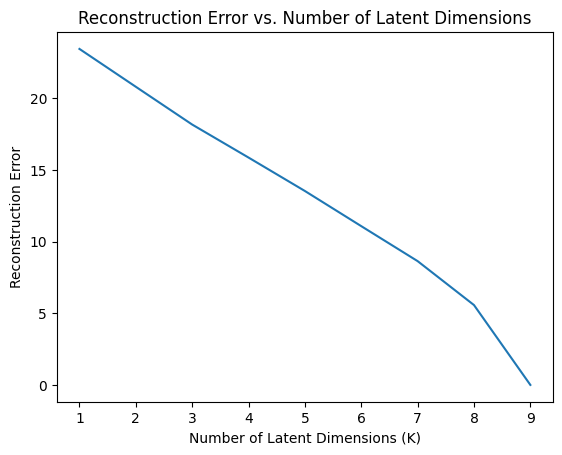

In [123]:
# AI tools (Bing Chat) used for the code and partly for commenting

# Initialize an empty list to store the reconstruction errors
errors = []

# Loop over the number of latent dimensions K from 1 to 9
for K in range(1, 10):
    # Perform matrix factorization on the grading matrix G
    U, V = matrix_factorization(G, K)
    
    # Compute the reconstruction error
    error = np.linalg.norm(G - U @ V, 'fro')
    
    # Append the reconstruction error to the list
    errors.append(error)

# Plot the reconstruction errors against the number of latent dimensions
plt.plot(range(1, 10), errors)
plt.xlabel('Number of Latent Dimensions (K)')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error vs. Number of Latent Dimensions')
plt.show()

### Task 05.10

Provide two scatter plots, one for the student representations $U$, and one for the course representations $V$, in $K$ dimensions. The course representations should be labeled with the course names.

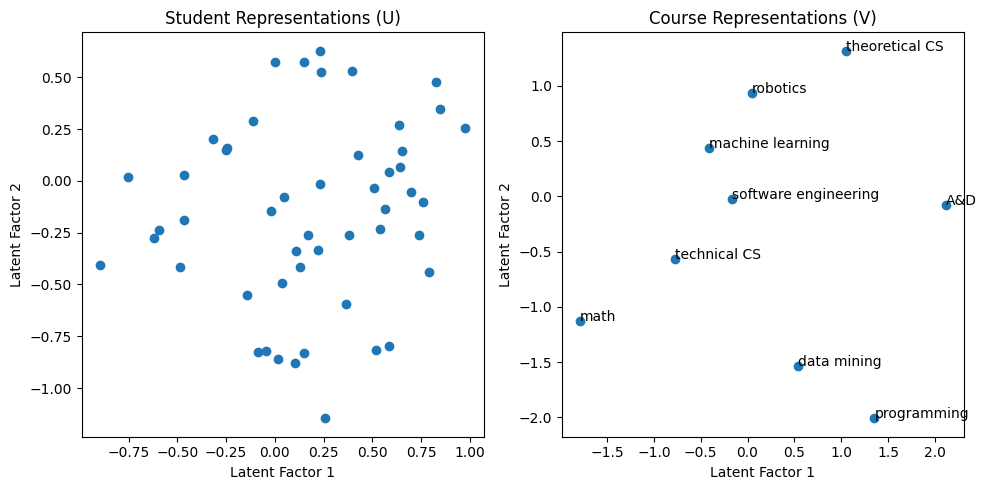

In [124]:
# AI tools (Bing Chat) used for the code and partly for commenting

# Perform matrix factorization with K=2
U, V = matrix_factorization(G, 2)

# Create a scatter plot for the student representations U
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(U[:, 0], U[:, 1])
plt.title('Student Representations (U)')
plt.xlabel('Latent Factor 1')
plt.ylabel('Latent Factor 2')

# Create a scatter plot for the course representations V
plt.subplot(1, 2, 2)
plt.scatter(V[0, :], V[1, :])
for i, course in enumerate(courses):
    plt.annotate(course, (V[0, i], V[1, i]))
plt.title('Course Representations (V)')
plt.xlabel('Latent Factor 1')
plt.ylabel('Latent Factor 2')

plt.tight_layout()
plt.show()

### Task 05.11

Make a copy of the original grading matrix $G$.
In the copy, fill in zeros using the entries of the product $U \cdot V$ for $K = 2$.
Plot the resulting grading matrix.

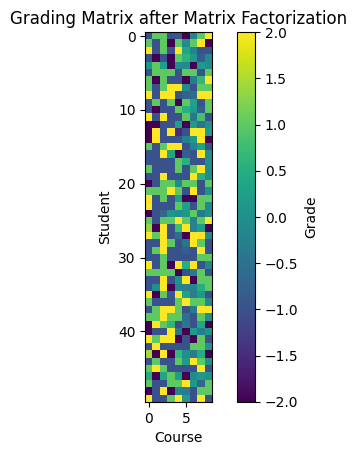

In [125]:
# AI tools (Bing Chat) used for the code and partly for commenting

# Make a copy of the original grading matrix G
G_copy = np.copy(G)

# Perform matrix factorization with K=2
U, V = matrix_factorization(G, 2)

# Compute the estimated grades
estimated_grades = U @ V

# Replace the zero entries in the copy of G with the corresponding entries from the estimated grades
G_copy[G_copy == 0] = estimated_grades[G_copy == 0]

# Plot the resulting grading matrix
plt.imshow(G_copy, cmap='viridis')
plt.colorbar(label='Grade')
plt.title('Grading Matrix after Matrix Factorization')
plt.xlabel('Course')
plt.ylabel('Student')
plt.show()

### Task 05.12

Discuss whether matrix factorization makes sense for this kind of data. In particular:

* Explain at least one advantage of matrix factorization for this data set.
* Explain at least two problems of matrix factorization for this data set.

**ANSWER:**

**Advantage:**
Matrix factorization can uncover latent features that explain the observed student grades. These latent features can represent underlying characteristics of the students and courses that are not explicitly provided in the data. For example, a latent feature might represent a student's affinity for theoretical subjects, or a course's difficulty level. This can provide a more nuanced understanding of the data and can improve the accuracy of the recommendations.

**Disadvantages:**
Cold Start Problem: Matrix factorization, like collaborative filtering, struggles with new students who have not yet attempted any courses. Since these students do not have any grades, it's hard to find similar students and make accurate recommendations.  

Overfitting: Matrix factorization can overfit to the observed data, especially if the number of latent features K is too large. This can lead to poor generalization performance on unseen data.  

Interpretability: While the latent features can improve the accuracy of the recommendations, they are not always easy to interpret. This can make it difficult to understand why a particular course was recommended.